Prediction with Regression
-----

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [4]:
cars = pd.read_csv("data/cars_multivariate.csv",
                  na_values='?')
cars.head(n=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


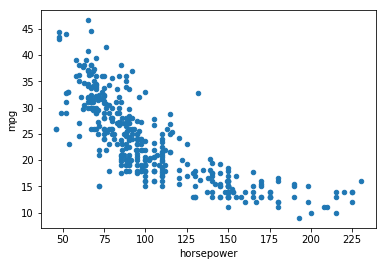

In [5]:
cars.plot('horsepower', 'mpg', kind='scatter');

Define model
-----

In [6]:
import statsmodels.api as sm

In [9]:
X = cars.horsepower
X = sm.add_constant(X)
y = cars.mpg

sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.03e-81
Time:                        13:37:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Another syntax to define models
----

In [10]:
cars.head(n=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu


In [58]:
# "formula notation" (similar to R)
import statsmodels.formula.api as smf

results = smf.ols(formula='mpg ~ horsepower', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.03e-81
Time:                        14:44:32   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Regression  

Instead of using `horsepower` as the only independent variable to predict `mpg`, we might want to include other independent variables in the model.  

Let's try to add `weight` to the model.

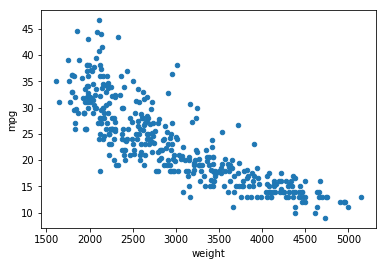

In [12]:
cars.plot('weight', 'mpg', kind='scatter');

In [13]:
X2 = cars[['horsepower', 'weight']]
X2 = sm.add_constant(X2)
y2 = cars.mpg

X2.head(n=2)

,const,horsepower,weight
0,1.0,130.0,3504.0
1,1.0,165.0,3693.0


In [57]:
results2 = sm.OLS(y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          3.06e-104
Time:                        14:44:05   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model fit?  

Our model explains about 70% of the variation in `mpg`.

So our multiple regression model is give by  

$$ \hat{mpg} = 45.6402 - 0.0473 \times horsepower - 0.0058 \times weight $$

What is the predicted `mpg` for a car with 200 `horsepower` and a `weight` of 3500?

In [20]:
results.predict((1, 200, 3500))

array([15.90008745])

$$ \hat{mpg} = 45.6402 - 0.0473 (200) - 0.0058 (3500) = 15.88 $$  


We would expected the `mpg` of the car to be 15.88.

Model Interpretation
-----

**Intercept** 

The mean value for $y$ when all $x=0$

Model Interpretation
-----

**slope**:

For each unit increase in $x$, the expected increase/decrease in $y$ 

In the case of multiple linear regression, we need to add "holding all other explanatory variables constant", since there are more than one exaplanatory variable in the model.

In [21]:
# The coefficients
sm.OLS(y2, X2).fit().params

const         45.640211
horsepower    -0.047303
weight        -0.005794
dtype: float64

We would expect `mpg` to decrease by 0.047 as `horsepower` goes up by 1,  **holding `weight` constant**.

We would expect `mpg` to decrease by 0.006 as `weight` increases by 1, **holding `horsepower` constant**, 

Other model syntax
-----

In [22]:
smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          3.06e-104
Time:                        13:42:48   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explore Multiple Regression
-------

[setosa.io/ev/ordinary-least-squares-regression/](http://setosa.io/ev/ordinary-least-squares-regression/)

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
# HT: https://www.datarobot.com/blog/multiple-regression-using-statsmodels/#appendix

## fit a OLS model with intercept on horsepower and weight
est = sm.OLS(y2, X2).fit()

## Create the 3d plot 
# horsepower/weight grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X2.horsepower.min(), X2.horsepower.max(), 100), 
                       np.linspace(X2.weight.min(), X2.weight.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2


Text(0.5, 0, 'mpg')

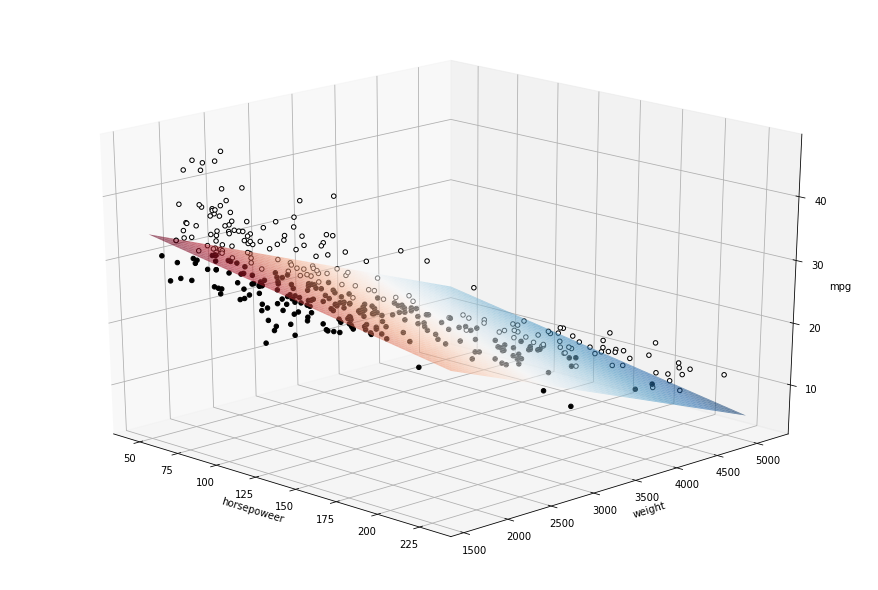

In [39]:
# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-45, elev=22.5)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y2 - est.predict(X2)
ax.scatter(X2[resid >= 0].horsepower, X2[resid >= 0].weight, y2[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].horsepower, X2[resid < 0].weight, y2[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('horsepoweer')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')

### The Multiple Regression Model

Multiple linear regression is very similar to simple linear regression except that the dependent variable $y$ is described by $k$ independent variables $x_1, \dots, x_k$  

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k + \varepsilon $$  

**Our predicted model**  

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_k x_k$$

* The interpretation of the intercept is the same  
* Slope $b_i$ is the change in $y$ given a unit change in $x_i$ while **holding all other variables constant**  


* SST, SSE, SSR, and $R^2$ are the same  
* $s_e$ is almost the same except now $s_e = \sqrt{ SSE / (n-k-1) }$  
* Slope coefficient C.I.s are the same  
* p-values (one for each $x_i$) are the same  

**Example**  

Now let's try to predict `mpg` using `displacement`, `horsepower`, `weight` and `acceleration`. 

In [40]:
cars[['displacement', 'horsepower', 'weight', 'acceleration']].corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


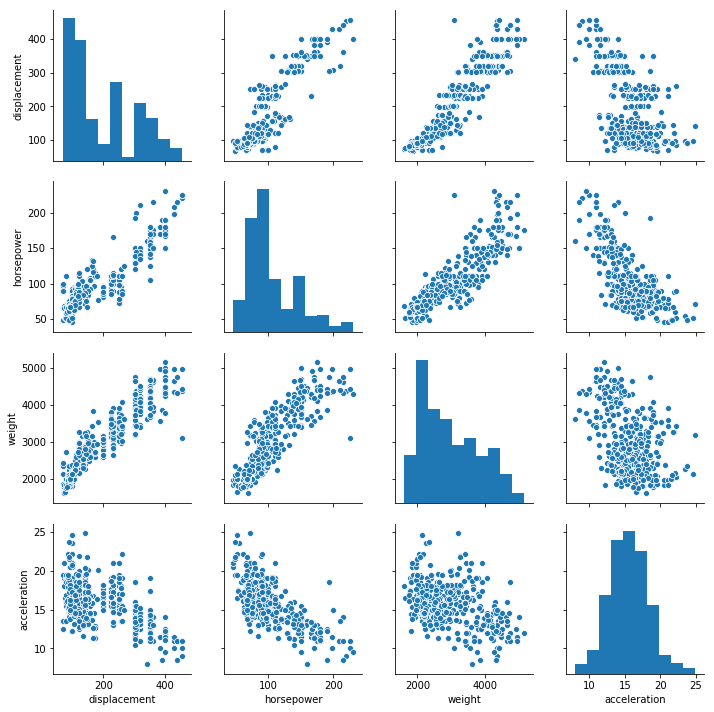

In [41]:
X3 = cars[['displacement', 'horsepower', 'weight', 'acceleration']]
sns.pairplot(X3);

In [42]:
X3 = sm.add_constant(X3)
y3 = cars.mpg

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          9.63e-102
Time:                        14:33:19   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How good is the model fit?

    R-squared = 0.707

What is our regression equation?

$$ \hat{mpg} = 45.2511 - 0.0060 \times displacement - 0.0436 \times horsepower - 0.0053 \times weight - 0.0231 \times acceleration $$

How do we interpret the model?

Is it a good idea to include `displacement` in the model?

$R^2$  
------

People love $R^2$.  

This leads to an overwhelming temptation to put lots of $X$’s in.  

This is a not great idea 💡. We want to summarize and predict, __and__ we want to do it in the simplest possible way. 

R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize.

The more complicated a model is, the less useful it tends to be (for example, harder to deploy into production environments).

In [53]:
rs = smf.ols(formula='mpg ~ horsepower', data=cars).fit().rsquared
f'{rs:.3}'

'0.606'

In [44]:
rs = smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().rsquared
f'{rs:.3}'

'0.706'

In [45]:
rs = smf.ols(formula='mpg ~ displacement + horsepower + weight + acceleration', data=cars).fit().rsquared
f'{rs:.3}'

'0.707'

Adjusted $R^2$  
------

The adjusted $R^2$ is designed to build in an automatic penalty for adding an $X$.  

$$R_a^2 = 1 - \frac{\frac{1}{n - k - 1} SSE}{\frac{1}{n - 1} SST} $$  

We use adjusted $R^2$ when we compare models with different numbers of independent variables.

$R^2$ penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

Is there a better approach to feature selection? 
------

<center><img src="https://i.stack.imgur.com/YWgro.gif" height="500"/></center>

**Cross-validation** provides a more reliable estimate of out-of-sample error.

Thus is a better way to choose which of your models will best **generalize** to out-of-sample data.

According to the adjusted $R^2$, which is the best model we have fitted so far?

    the second with horsepower and weight

Summary
-----

- We extend to linear regression to include many explanatory variables (Xs).
- It is very similar to simple linear regression.
- Remember is the independent of all other explanatory variables.
- $R^2$ allows use to measure how good a model fits the data.
- Adjusted $R^2$ penalizes adding non-useful explanatory variables.

<br>
<br> 
<br>

----

----
Bonus Material
----

### The Overall F Test  

Instead of testing if one independent variable is useful for predicting the dependent variable, we might want to test if the model as a whole is useful for predicting the dependent variable.  

For that, we use the F test.  

* It tests the null hypothesis:  

$$ H_0: \beta_1 = \beta_2 = \dots = \beta_k = 0$$  

* Under the null hypothesis, there are no $X$ variables in the model.  

* The alternative hypothesis:  

$$ H_a: \text{ at least one } \beta_i \neq 0 $$  

**Test statistic**  

$$f = \frac{\frac{SSR}{k}}{\frac{SSE}{(n - k - 1)}}$$ 

The larger the value of $f$, the stronger the evidence to reject the null.  

The test statistic follows an F distribution, and we find the p-value by comparing the test statistic to an F distribution with degress of freedom $k$ and $n - k - 1$.   

We will simply read the p-value from the regression output. (Score!)

In [59]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          9.63e-102
Time:                        14:44:47   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\text{F-statistic} = 233.4$$
$$\text{p-value} = 9.63 \times 10^{-102} $$   

We have extremely strong evidence to conclude that the at least one of the variables in the model is useful for predicting `mpg`.

Is Model 1 (with one variable `horsepower`) useful for predicting `mpg`?

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.03e-81
Time:                        14:44:51   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is Model 2 (with two variables `horsepower` and `weight`) useful for predicting `mpg`?

In [61]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          3.06e-104
Time:                        14:44:52   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X4 = cars[['displacement', 'horsepower', 'acceleration']]

X4 = sm.add_constant(X4)
y3 = cars.mpg

model4 = sm.OLS(y3, X4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     268.5
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           2.83e-94
Time:                        14:47:09   Log-Likelihood:                -1141.0
No. Observations:                 392   AIC:                             2290.
Df Residuals:                     388   BIC:                             2306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2547      2.579     17.937      0.000      41.185      51.325
displacement    -0.0367      0.005     -7.290      0.000      -0.047      -0.027
horsepower      -0.0888      0.016     -5.607      0.000      -0.120      -0.058
acceleration    -0.4122      0.116     -3.547      0.000      -0.641      -0.184
==============================================================================
Omnibus:                       51.359   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.203
Skew:                           0.868   Prob(JB):                     7.71e-17
Kurtosis:                       4.237   Cond. No.                     2.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X5 = cars[['weight']]

X5 = sm.add_constant(X5)
y5 = cars.mpg

model5 = sm.OLS(y5, X5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          6.02e-102
Time:                        14:55:58   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>
<br> 
<br>

----